# Course Machine Learning for Particle Physicists
##  PhD course Spring 2020
## Lecture VIII : Explainable AI
###  by Veronica Sanz (Universitat de Valencia/ IFIC)


In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
# bigger fonts
plt.rcParams['font.size'] = 18
from collections import Counter
import seaborn as sns
import sklearn 
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Description of the dataset

http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html



In [0]:
url = 'https://www.dropbox.com/s/gl9bb7vhiafa9dw/adult.csv?dl=1'
income_df = pd.read_csv(url)
# Drop NaNs
income_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### This dataset needs cleaning before using it for an analysis

In [0]:
# Data cleaning
income_df.age = income_df.age.astype(float)
income_df['hours-per-week'] = income_df['hours-per-week'].astype(float)
my_df = income_df.dropna()
my_df['predclass'] = my_df['income']
del my_df['income']
my_df['education-num'] = my_df['educational-num']
del my_df['educational-num']

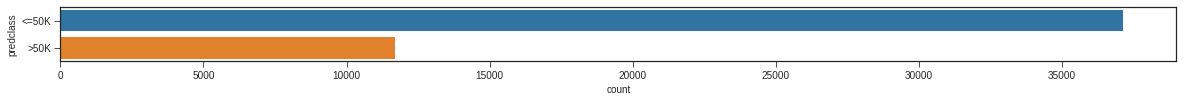

In [0]:
# This is an unbalanced dataset
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=my_df)

### There are more 50K- examples than 50K+. Think on ways this could affect your analysis

### Now let's simplify and group feature categories

In [0]:
# Simplify education and marital status and discretize age
my_df['education'].replace('Preschool', 'dropout',inplace=True)
my_df['education'].replace('10th', 'dropout',inplace=True)
my_df['education'].replace('11th', 'dropout',inplace=True)
my_df['education'].replace('12th', 'dropout',inplace=True)
my_df['education'].replace('1st-4th', 'dropout',inplace=True)
my_df['education'].replace('5th-6th', 'dropout',inplace=True)
my_df['education'].replace('7th-8th', 'dropout',inplace=True)
my_df['education'].replace('9th', 'dropout',inplace=True)
my_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace('Masters', 'Masters',inplace=True)
my_df['education'].replace('Prof-school', 'Masters',inplace=True)
my_df['education'].replace('Doctorate', 'Doctorate',inplace=True)
my_df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)
my_df['age_bin'] = pd.cut(my_df['age'], 20)

### Below some examples of plots for you. Look at them, do new ones. 
### What conclusions can you draw?

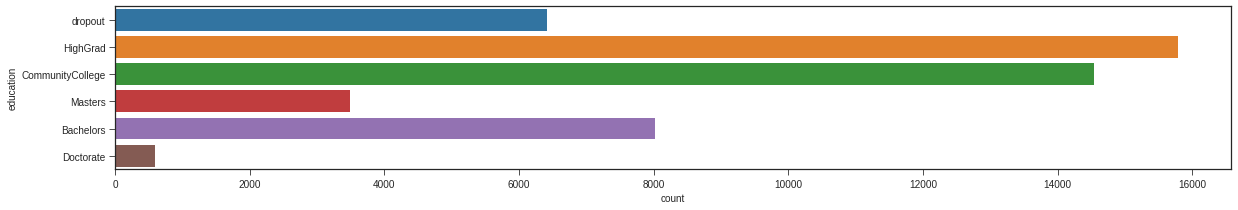

In [0]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=my_df)


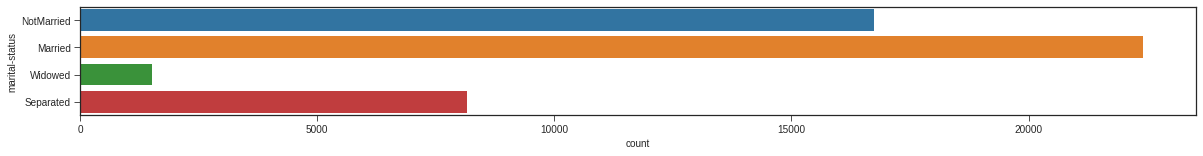

In [0]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=my_df)

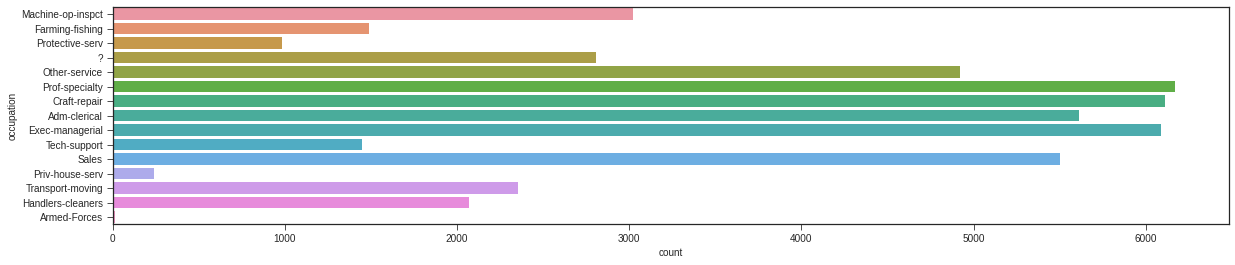

In [0]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=my_df)

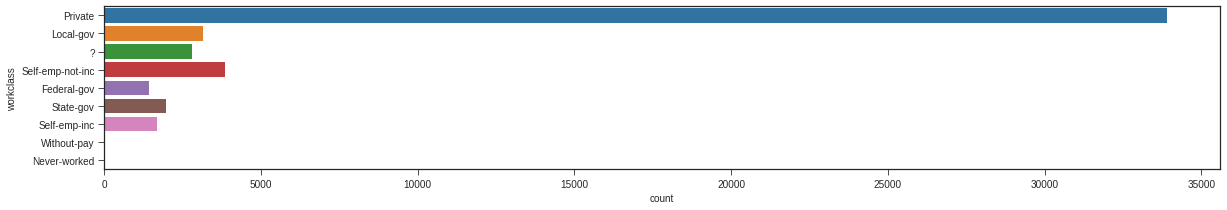

In [0]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=my_df)

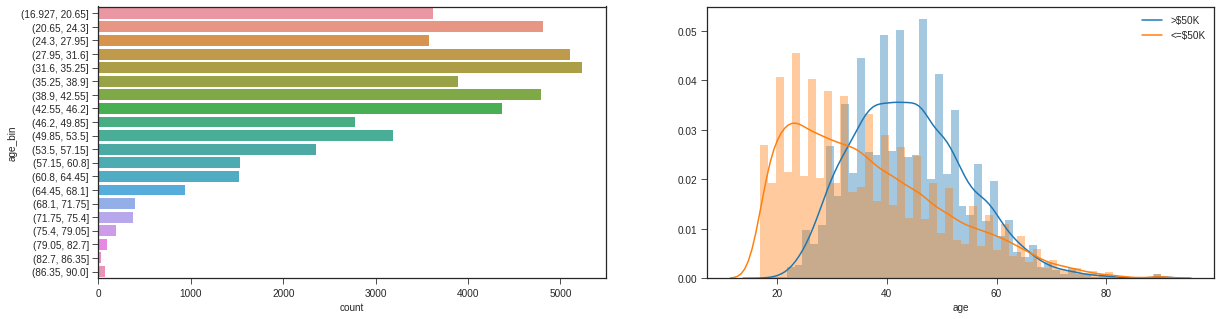

In [0]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=my_df)
plt.subplot(1, 2, 2)
sns.distplot(my_df[my_df['predclass'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

<Figure size 1440x360 with 0 Axes>

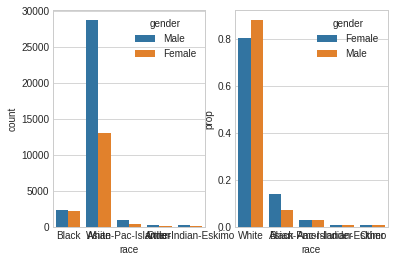

In [0]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "gender"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=my_df, ax=axes[0])

prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

In [0]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
my_df['hours-per-week_bin'] = pd.cut(my_df['hours-per-week'], 10)
my_df['hours-per-week'] = my_df['hours-per-week']

(20.0, 60.0)

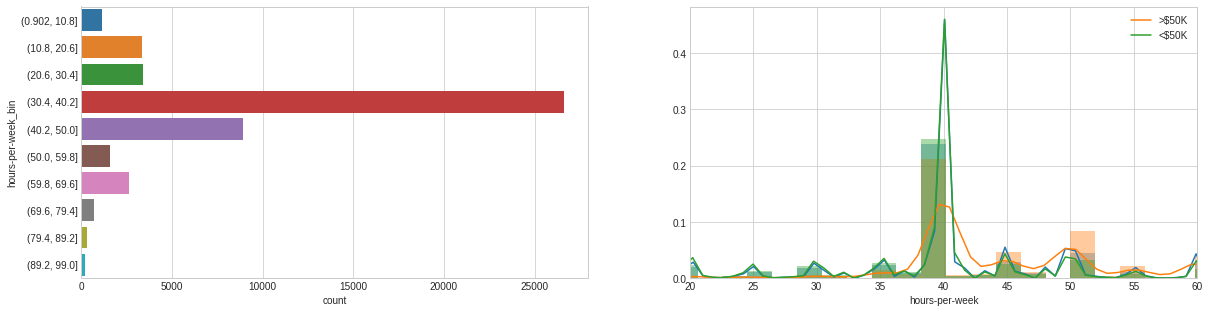

In [0]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df['hours-per-week']);
sns.distplot(my_df[my_df['predclass'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

### Now let's look at professions
### Is there anything you can say?

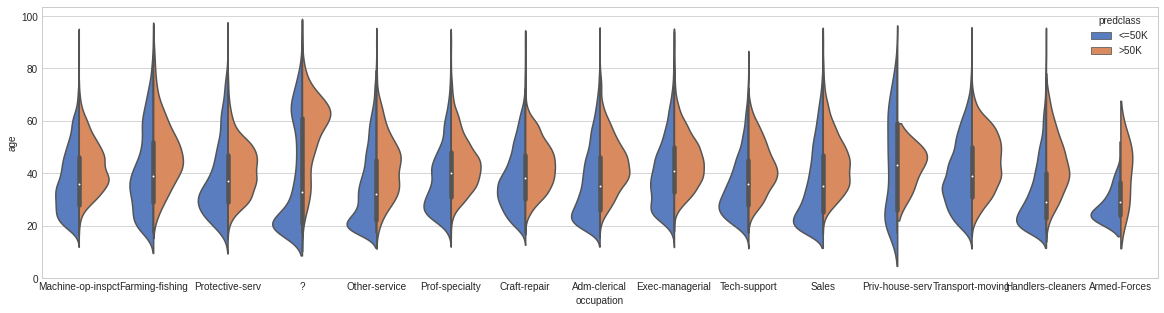

In [0]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

### Now let's prep for the numerical analysis
### some features need to be transformed to categorical (remember the first notebook, the regression problem with 'seasons')

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predclass,education-num,age_bin,hours-per-week_bin
0,8,4,19329,5,1,7,3,2,1,0,0,39,39,0,6,2,3
1,21,4,4212,3,0,5,0,4,1,0,0,49,39,0,8,5,4
2,11,2,25340,1,0,11,0,4,1,0,0,39,39,1,11,3,3
3,27,4,11201,1,0,7,0,2,1,98,0,39,39,1,9,7,3
4,1,0,5411,1,1,0,3,4,0,0,0,29,39,0,9,0,2


### Here we drop some classes which don't seem to matter much
#### if you do this, remember to come back and check whether this is indeed the case

In [0]:

drop_elements = ['predclass','fnlwgt','native-country','workclass']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)
X.head()


,age,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,education-num,age_bin,hours-per-week_bin
0,8,5,1,7,3,2,1,0,0,39,6,2,3
1,21,3,0,5,0,4,1,0,0,49,8,5,4
2,11,1,0,11,0,4,1,0,0,39,11,3,3
3,27,1,0,7,0,2,1,98,0,39,9,7,3
4,1,1,1,0,3,4,0,0,0,29,9,0,2


In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)


### Build a shallow NN (2 hidden layers)
#### here I found the choice of optimizer to be important
#### try with different optimizers and architectures and you'll see what I mean

In [0]:

# Sequential means you can build a DNN layer by layer
fcmodel = Sequential()
# Dense has as arguments: 
#  number of neurons, type of activation function, and the input needs to match the output of the previous layer
#  input_shape=(N_features,) where N_features = 28*28
fcmodel.add(Dense(32, activation='relu',input_shape=X_train.shape[1:]))
# we add a second layer
fcmodel.add(Dense(52, activation='relu'))
fcmodel.add(Dense(22, activation='relu'))
# could include dropout, regularisation, ...
fcmodel.add(Dense(2, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-3, momentum=0.9, nesterov=True)
nadam=tf.keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
fcmodel.compile(loss='categorical_crossentropy',
                optimizer=nadam,
                metrics=['accuracy'])


# All parameter gradients will be clipped to
# a maximum norm of 1.


In [0]:
batch_size = 32
epochs = 20

In [0]:
# training the NN
history = fcmodel.fit(X_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(X_test, y_test))

Epoch 1/20
1222/1222 [==============================] - 2s 2ms/step - loss: 0.3933 - accuracy: 0.8159 - val_loss: 0.3674 - val_accuracy: 0.8140
Epoch 2/20
1222/1222 [==============================] - 2s 2ms/step - loss: 0.3504 - accuracy: 0.8365 - val_loss: 0.5911 - val_accuracy: 0.7111
Epoch 3/20
1222/1222 [==============================] - 2s 2ms/step - loss: 0.3423 - accuracy: 0.8410 - val_loss: 0.4217 - val_accuracy: 0.8151
Epoch 4/20
1222/1222 [==============================] - 2s 2ms/step - loss: 0.3373 - accuracy: 0.8417 - val_loss: 0.4183 - val_accuracy: 0.7846
Epoch 5/20
1222/1222 [==============================] - 2s 2ms/step - loss: 0.3343 - accuracy: 0.8450 - val_loss: 0.3316 - val_accuracy: 0.8445
Epoch 6/20
1222/1222 [==============================] - 2s 2ms/step - loss: 0.3323 - accuracy: 0.8451 - val_loss: 0.3390 - val_accuracy: 0.8419
Epoch 7/20
1222/1222 [==============================] - 2s 2ms/step - loss: 0.3301 - accuracy: 0.8454 - val_loss: 0.3717 - val_accuracy:

In [0]:
def histplot(history):
    hist = pd.DataFrame(history.history)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    hist.plot(y=['loss','val_loss'], ax=ax1)
    min_loss = hist['val_loss'].min()
    ax1.hlines(min_loss, 0, len(hist), linestyle='dotted',
               label='min(val_loss) = {:.3f}'.format(min_loss))
    ax1.legend(loc='upper right')
    hist.plot(y=['accuracy','val_accuracy'], ax=ax2)
    max_acc = hist['val_accuracy'].max()
    ax2.hlines(max_acc, 0, len(hist), linestyle='dotted',
               label='max(val_accuracy) = {:.3f}'.format(max_acc))
    ax2.legend(loc='lower right', fontsize='large')

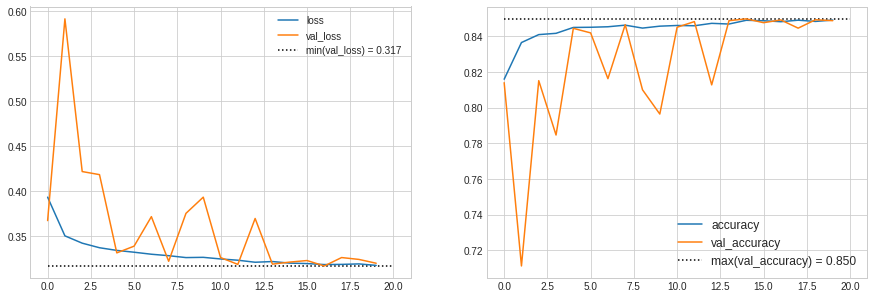

In [0]:
histplot(history)

### 85% is good, but accuracy by itself is not enough
#### in a classification problem we need to look at other metrics 
#### and the Confusion Matrix (FP,TP,FN,TN) helps us computing Recall/F1...

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(3, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

[[7058  416]
 [1061 1234]]


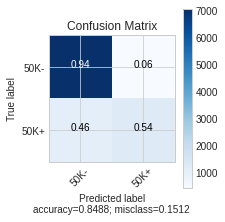

In [0]:
from sklearn.metrics import confusion_matrix
# make predictions on the validation
predIdxs = fcmodel.predict(X_test, batch_size=32)

# for each image in the validation set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)


cm = confusion_matrix(y_test.argmax(axis=1), predIdxs)

print(cm)

plot_confusion_matrix(cm , 
                      normalize    = True,
                      target_names = ['50K-','50K+'],
                      title        = "Confusion Matrix")


###   This confusion matrix is shown as unnormalized (top) and normalized (bottom) 
### What conclusions do you draw? 


## Suggestions to explore: 
### see  some of the Notebooks (called Kernels there) in Kaggle: https://www.kaggle.com/wenruliu/adult-income-dataset 
### Check on techniques for unbalanced datasets
### Try Decision trees, find the most important features
### Drop one feature at a time, and re-run your model. What can you conclude?
### What sectors are worst predicted by the model? 
### Do some PCA and clustering analysis